In [1]:
# General:
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from nltk.corpus import stopwords

In [100]:
"""Importação dos Dados"""

'Importação dos Dados'

In [3]:
hillary=pd.read_csv("hillary_clean.txt",delimiter=",",error_bad_lines=False)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
trump=pd.read_csv("trump_clean.txt",delimiter=",",error_bad_lines=False)

In [101]:
"""Limpeza dos Dados"""

'Limpeza dos Dados'

In [5]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [8]:
# d2 = []
# for tweet in trump['text']:
#     d2.append(analize_sentiment(str(tweet)))


In [6]:
# d1 = []
# for tweet in hillary['text']:
#     d1.append(analize_sentiment(str(tweet)))

In [7]:
# hillary['sentiment'] = d1

In [29]:
pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
palavras = trump['text'].replace(pattern,'',regex=True)
palavras= palavras.replace(r'http:\S+', '', regex=True).replace().replace(r'www\S+', '', regex=True).replace(r'https:\S+', '', regex=True).replace(r'instagram\S+', '', regex=True).replace(r'j.mp\S+', '', regex=True).replace(r'bit.ly\S+','',regex=True).replace(r'@\S+','',regex=True).replace(r'pic\D+','',regex=True).replace(r'fb\D+','',regex=True).replace(r'sfl\D+','',regex=True).replace(r'kk\D+','',regex=True).replace('n','').replace('q','').replace('nao','').replace('vao','').replace('ne','').replace('voces','').replace('vc','').replace('bua','').replace('fiinho','').replace('maie','').replace('maie','')


In [24]:
def removestopwords(texto):
    frases = []
   
    for palavras in texto:
        
        palavras = str(palavras)
        palavras = palavras.replace('?','')
        palavras = palavras.replace('#','')
        palavras = palavras.replace('!','')
        palavras = palavras.replace('%','')
        palavras = palavras.replace('.','')
        palavras = palavras.replace(')','')
        palavras = palavras.replace('(','')
        palavras = palavras.replace('-','')
        palavras = palavras.replace(',','')
        palavras = palavras.replace('/ ','')
        palavras = palavras.replace('*','')
        palavras = palavras.replace('=','')
        palavras = palavras.replace(':','')
        palavras = ' '.join(palavras.split())
        
        palavras = palavras.replace('r$','')
               
        palavras = palavras.replace('á','a')
        palavras = palavras.replace('à','a')
        palavras = palavras.replace('â','a')
        palavras = palavras.replace('ã','a')
        
        palavras = palavras.replace('é','e')
        palavras = palavras.replace('è','e')
        palavras = palavras.replace('ê','e')
        

        
        palavras = palavras.replace('í','i')
        palavras = palavras.replace('ì','i')
        palavras = palavras.replace('î','i')
                       
        palavras = palavras.replace('ó','o')
        palavras = palavras.replace('ò','o')
        palavras = palavras.replace('ô','o')
        palavras = palavras.replace('õ','o')
        
        palavras = palavras.replace('ú','u')
        palavras = palavras.replace('ù','u')
        palavras = palavras.replace('û','u')
               
        palavras = palavras.replace('ç','c')
        
        palavras = palavras.lower()
        
        frases.append(palavras)

    return frases

In [31]:
# palavras = removestopwords(palavras)

In [32]:
# trump['text'] = palavras

In [9]:

# hillary.to_csv('hillary_clean.txt', sep=',', mode='a',index=False)

In [102]:
"""Análise Temporal"""

'Análise Temporal'

In [24]:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
positivo = trump.loc[trump['sentiment'] == 1]
negativo = trump.loc[trump['sentiment'] == -1]
neutro  = trump.loc[trump['sentiment'] == 0]


In [26]:
positivo1 = hillary.loc[hillary['sentiment'] == 1]
negativo1 = hillary.loc[hillary['sentiment'] == -1]
neutro1  = hillary.loc[hillary['sentiment'] == 0]


In [39]:
positivo.index = pd.to_datetime(positivo.date)
negativo.index = pd.to_datetime(negativo.date)
neutro.index = pd.to_datetime(neutro.date)


In [41]:
positivo1.index = pd.to_datetime(positivo1.date)
negativo1.index = pd.to_datetime(negativo1.date)
neutro1.index = pd.to_datetime(neutro1.date)

In [31]:
positivo = positivo.rename(columns={"sentiment":"Positivo - Trump"})
positivo1 = positivo1.rename(columns={"sentiment":"Positivo - Hillary"})

In [83]:
positivo_plot = positivo['Positivo - Trump'].groupby( [positivo.index.month] ).count()

In [84]:
positivo_plot1 = positivo1['Positivo - Hillary'].groupby( [positivo1.index.month] ).count()

In [48]:
negativo = negativo.rename(columns={"sentiment":"Negativo - Trump"})


In [49]:
negativo1 = negativo1.rename(columns={"sentiment":"Negativo - Hillary"})

In [85]:
negative_plot = negativo['Negativo - Trump'].groupby( [negativo.index.month] ).count()


In [86]:
negative_plot1 = negativo1['Negativo - Hillary'].groupby( [negativo1.index.month] ).count()

In [87]:
neutro = neutro.rename(columns={"sentiment":"Neutro - Trump"})
neutral_plot = neutro['Neutro - Trump'].groupby( [neutro.index.month] ).count()

In [88]:
neutro1 = neutro1.rename(columns={"sentiment":"Neutro - Hillary"})
neutral_plot1 = neutro1['Neutro - Hillary'].groupby( [neutro1.index.month] ).count()

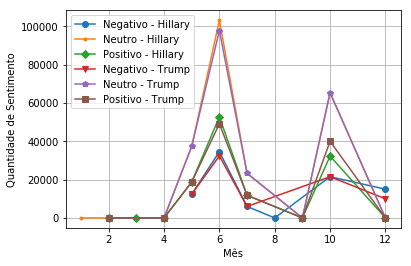

In [99]:
import matplotlib.dates as mdates
negative_plot1.plot(marker='o')
neutral_plot1.plot(marker='.')
positivo_plot1.plot(marker='D')


negative_plot.plot(marker='v')
neutral_plot.plot(marker='p')
positivo_plot.plot(marker='s')

plt.ylabel("Quantidade de Sentimento")
plt.xlabel("Mês")
plt.legend()
plt.grid(True)

In [103]:
"""Classificador Naive Bayes"""

'Classificador Naive Bayes'

In [2]:
from textblob import TextBlob
import pandas as pd  
import numpy as np
from textblob.classifiers import NaiveBayesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn import naive_bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt

In [11]:
frames = [trump, hillary]

result = pd.concat(frames)

In [14]:
subset = result[['text', 'sentiment']]
result_tuple = [tuple(x) for x in subset.values]

In [15]:
vectorizer = TfidfVectorizer(use_idf=True,
                             lowercase=True, strip_accents='ascii', stop_words=None)

In [16]:
Y = result['sentiment']

In [17]:
X = vectorizer.fit_transform(result['text'].values.astype('U'))

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [19]:
clf = naive_bayes.MultinomialNB()

In [25]:
clf.fit(X_train,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [26]:
tweet = np.array(['I hate Trump'])

In [27]:
tweet_vector = vectorizer.transform(tweet)

In [28]:
print(clf.predict(tweet_vector))

[-1]


In [29]:
clf.score(X_train,Y_train)

0.9075928334405062

In [30]:
numpy_matrix = result['text'].as_matrix()

In [31]:
tweet_vector = vectorizer.transform(numpy_matrix.astype('U'))

In [3]:
result=pd.read_csv("result.csv",delimiter=",",error_bad_lines=False)


In [9]:
p = []
for predict in result['predict']:
    if(predict == '[0]'):
        predict = 0
        p.append(predict)
    elif(predict== '[1]'):
        predict = 1
        p.append(predict)
    else:
        predict = -1
        p.append(predict)

Automatically created module for IPython interactive environment
(3, 3)


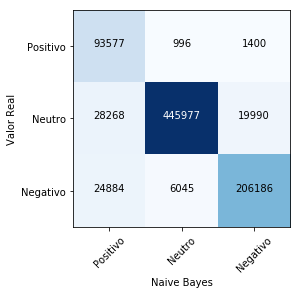

In [62]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd 
data=pd.read_csv("result.csv",delimiter=",",encoding='latin-1')

# import some data to play with

y = data['predict']
X = data['sentiment']
class_names = ['Positivo', 'Neutro', 'Negativo']





def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """



    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    
    fmt = '.2f' if normalize else 'd'
    print(cm.shape)
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Valor Real')
    plt.xlabel('Naive Bayes')
# Compute confusion matrix
cnf_matrix = confusion_matrix(y, X)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names)

# Plot normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                       title='Normalized confusion matrix')

plt.show()

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
accuracy_score(X, y)

0.9013891793169052

In [70]:
from sklearn.metrics import f1_score
f1_score(X, y, average='macro')

0.8667198856317008

In [71]:
from sklearn.metrics import precision_score

In [72]:
precision_score(X, y, average='macro')  

0.9156513394941782

In [73]:
from sklearn.metrics import recall_score
recall_score(X, y, average='macro') 

0.8427403156067411